<a href="https://colab.research.google.com/github/SatendraKumar82/Global_Terrorism_EDA_Project.ipynb/blob/main/Global_Terrorism_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



>



##**Satendrakumar**

## **Project Summary**-

 through this project we will know using graphs, plots and code that what is terrorist activites each year why they are attcking on people and country what things  they want to get from the people and country and what kind of attacks have been carried out the most so far in the world. Which year to which year the most attacks happened by the terrorist and by what percentage terrorist attacks have increased from 1970 to 2017 and one of the most important thing is which countries have terrorist organization and supporting, spreeding.

## **GitHub-Link**-https://github.com/satendradakd10

Problem : As a security/defence analyst, try to find out the hot zone of terrorism. What all security Issues and insights you can derive by EDA?

Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
#Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Loading the Global Terrorim Dataset

path =('/content/drive/MyDrive/Global Terrorism Data.csv')

In [ ]:
terror = pd.read_csv(path,encoding='latin-1')

<ipython-input-59-c3daa9ee4302>:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
terror

eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            58  Dominican Republic       2  ...      NaN   
1           130              Mexico       1  ...      NaN   
2           160         Philippines       5  ...      NaN   
3            78              Greece       8  ...      NaN   
4           101               Japan       4  ...      NaN   
...         ...                 ...     ...  ...      ...   
181686      182             Somalia      11  ...      NaN   
181687      200               Syria      10  ...      NaN   
181688      160         Philippines       5  ...      NaN   
181689       92               India       6  ...      NaN   
181690      160         Philippines       5  ...      NaN   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0                           PGIS        0         0        0       0      Na

In [ ]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Note: Since it contains 135 columns. They have a huge proportion in dataset and Learnig  them doesn't make any sence. so, we will rename the columns name for better understanding and then we will only extract necessary columns.

In [ ]:
terror.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
terror=terror[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
terror.head(12)

Year  Month  Day             Country       State  \
0   1970      7    2  Dominican Republic         NaN   
1   1970      0    0              Mexico     Federal   
2   1970      1    0         Philippines      Tarlac   
3   1970      1    0              Greece      Attica   
4   1970      1    0               Japan     Fukouka   
5   1970      1    1       United States    Illinois   
6   1970      1    2             Uruguay  Montevideo   
7   1970      1    2       United States  California   
8   1970      1    2       United States   Wisconsin   
9   1970      1    3       United States   Wisconsin   
10  1970      1    1       United States   Wisconsin   
11  1970      1    6       United States    Colorado   

                         Region           city   latitude   longitude  \
0   Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                 North America    Mexico city  19.371887  -99.086624   
2                Southeast Asia        Unknown  15.478598  120.599741   
3                Western Europe         Athens  37.997490   23.762728   
4                     East Asia        Fukouka  33.580412  130.396361   
5                 North America          Cairo  37.005105  -89.176269   
6                 South America     Montevideo -34.891151  -56.187214   
7                 North America        Oakland  37.791927 -122.225906   
8                 North America        Madison  43.076592  -89.412488   
9                 North America        Madison  43.072950  -89.386694   
10                North America        Baraboo  43.468500  -89.744299   
11                North America         Denver  39.758968 -104.876305   

                        AttackType  Killed  Wounded  \
0                    Assassination     1.0      0.0   
1      Hostage Taking (Kidnapping)     0.0      0.0   
2                    Assassination     1.0      0.0   
3                Bombing/Explosion     NaN      NaN   
4   Facility/Infrastructure Attack     NaN      NaN   
5                    Armed Assault     0.0      0.0   
6                    Assassination     0.0      0.0   
7                Bombing/Explosion     0.0      0.0   
8   Facility/Infrastructure Attack     0.0      0.0   
9   Facility/Infrastructure Attack     0.0      0.0   
10               Bombing/Explosion     0.0      0.0   
11  Facility/Infrastructure Attack     0.0      0.0   

                                               Target  \
0                                        Julio Guzman   
1                             Nadine Chaval, daughter   
2                                            Employee   
3                                        U.S. Embassy   
4                                      U.S. Consulate   
5                           Cairo Police Headquarters   
6   Juan Maria de Lucah/Chief of Directorate of in...   
7                                     Edes Substation   
8   R.O.T.C. offices at University of Wisconsin, M...   
9   Selective Service Headquarters in Madison Wisc...   
10                            Badger Army ammo depot.   
11           Army Recruiting Station, Denver Colorado   

                                              Summary  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5   1/1/1970: Unknown African American assailants ...   
6                                                 NaN   
7   1/2/1970: Unknown perpetrators detonated explo...   
8   1/2/1970: Karl Armstrong, a member of the New ...   
9   1/3/1970: Karl Armstrong, a member of the New ...   
10                                                NaN   
11  1/6/1970: Unknown perpetrators threw a Molotov...   

                                 Group                  Target_type  \
0                               MANO-D  Private Citize

Exploratory Data Analysis

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Killed'}>],
       [<Axes: title={'center': 'Wounded'}>, <Axes: >, <Axes: >]],
      dtype=object)

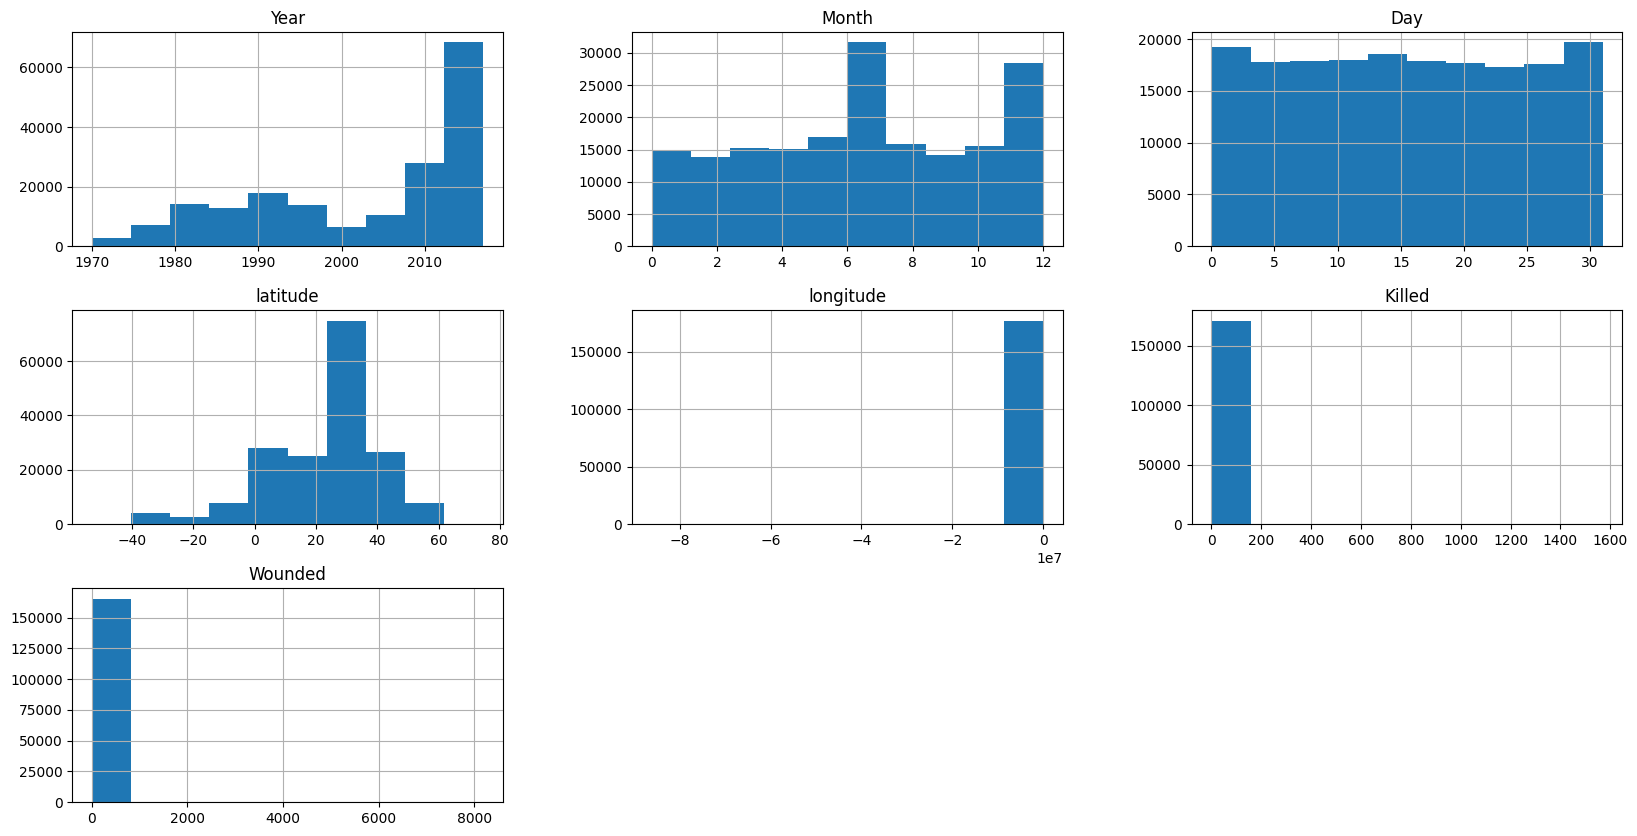

In [ ]:
terror.hist(figsize = (20,10)) # This represets the distribution of data on each  series in the DataFrame.

In [ ]:
terror.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

Correlation Analysis

<ipython-input-67-4d5054a6b296>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

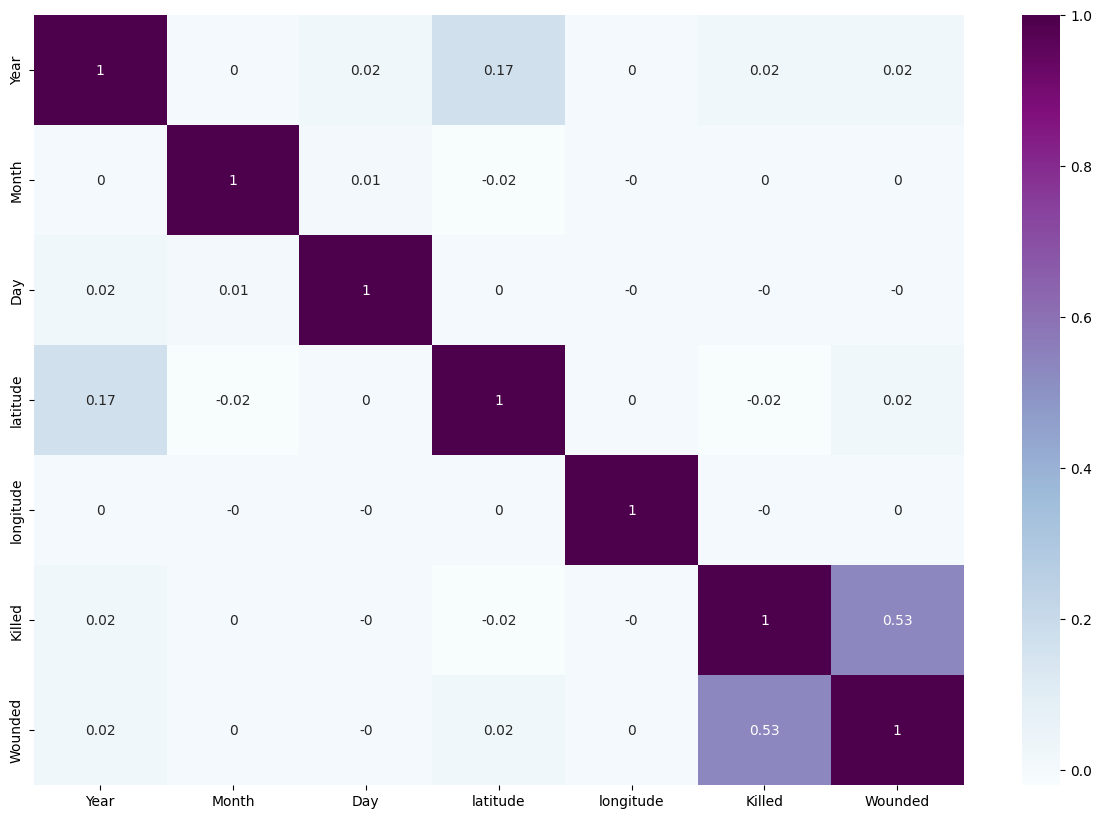

In [ ]:
plt.figure(figsize=(15,10))
# This shows. how much related is one parameter to the other in the dataset.
sns.heatmap(np.round(terror.corr(),2),annot=True,cmap='BuPu')




Terrorist Activities by Region in each Year through Area Plot

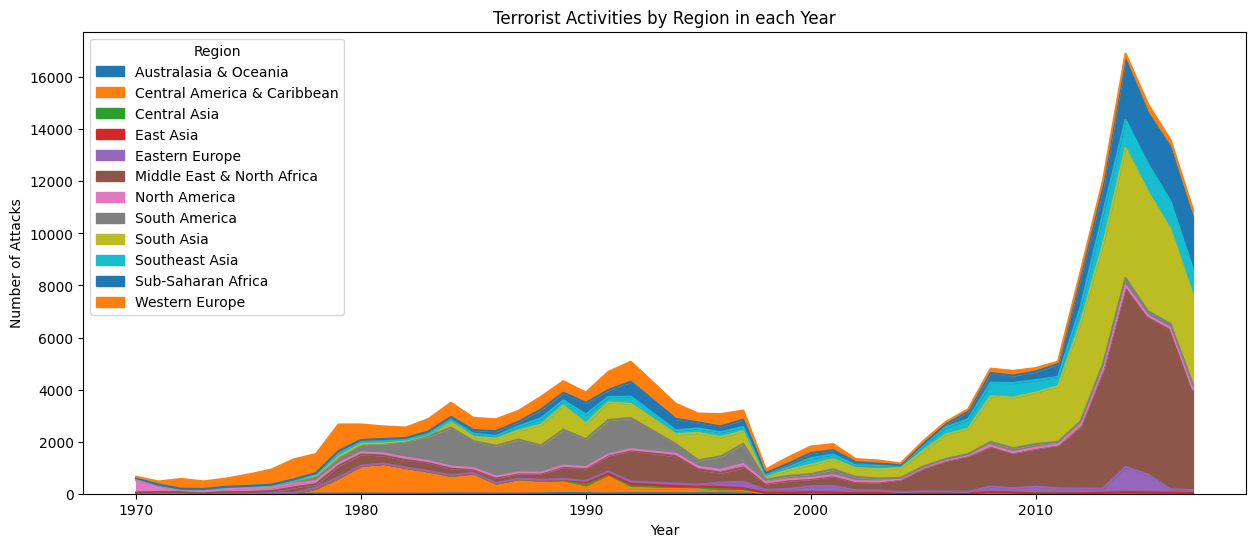

In [ ]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

Number of Terrorist Activities Each Year

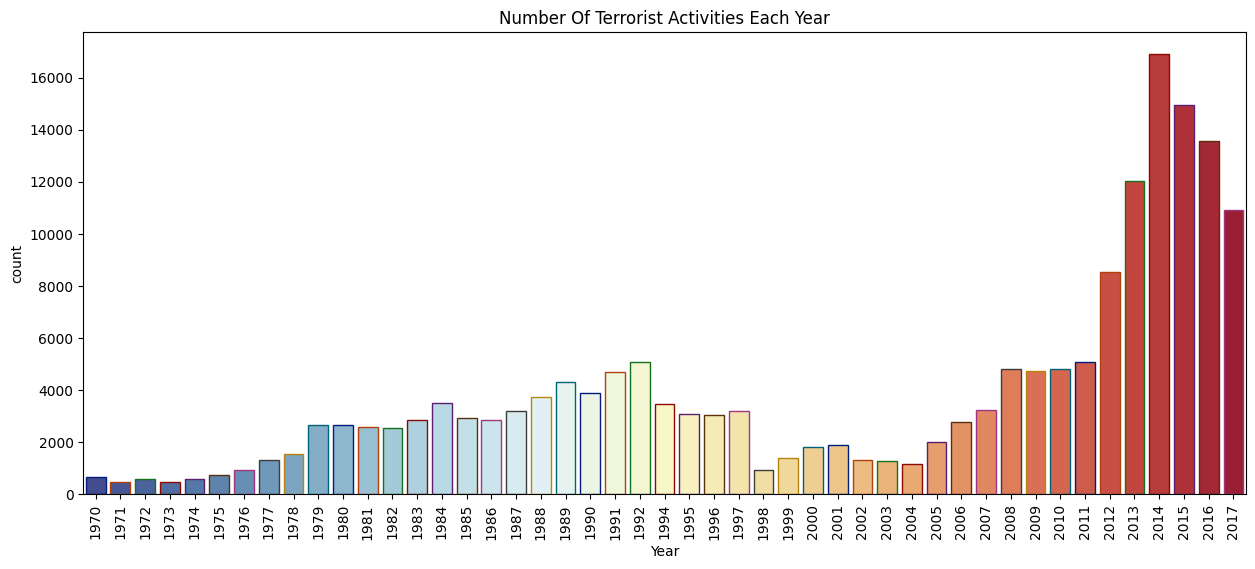

In [ ]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=terror, palette='RdYlBu_r', edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=90)
plt.title("Number Of Terrorist Activities Each Year")
plt.show()

Since 2014 and 2015 has a large number of Terrorist activities.

Number of attack were there in 1970 & 2017 and Also find percentage the attacks have increased.

In [ ]:
Year=terror.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 &',Year[2017],'attacks happened in 2017')
print('So the number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 attacks happened in 1970 & 10900 attacks happened in 2017
So the number of attacks from 1970 has increased by 94.0 % till 2017


The number of casualities corresponding to the killed people in each country for each year.

In [ ]:
px.scatter(terror,terror.Wounded,terror.Killed,hover_name='Country',animation_frame='Year',animation_group='Country',color='AttackType',
           range_color=[0,1],labels={'Killed':'Deaths','Wounded':'Caualities'},
           title='Number of casualities vs Killed people in each country for each year')

Methods of Attack

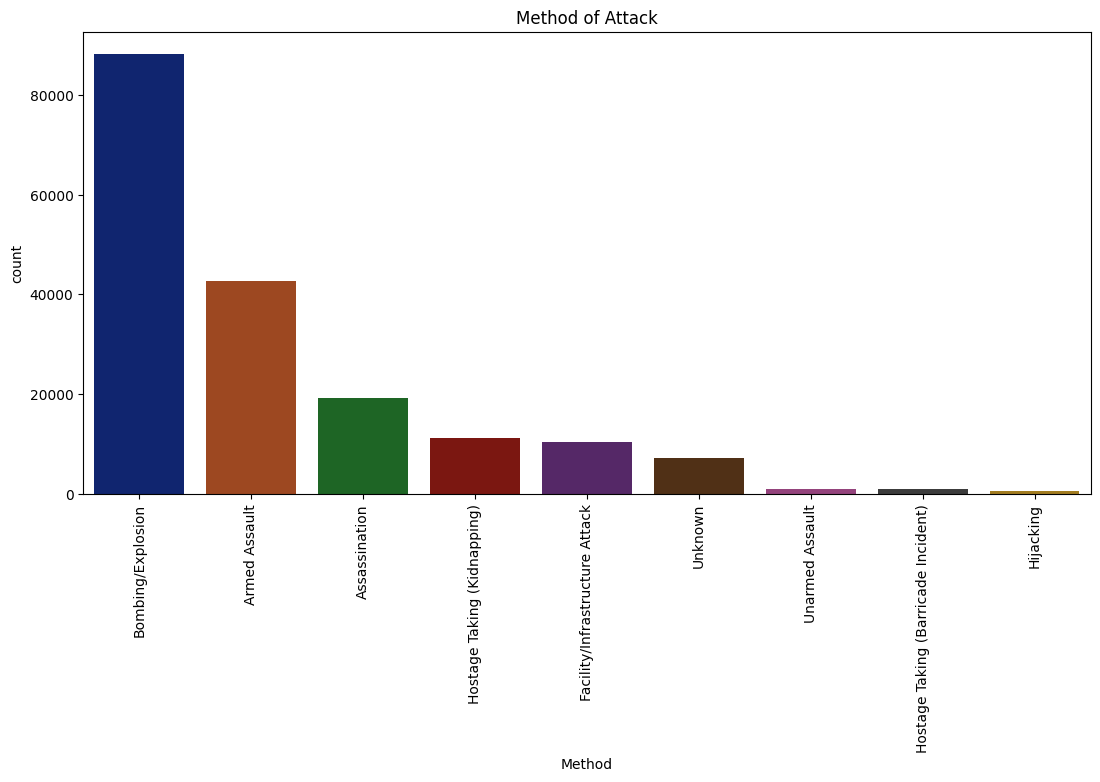

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x=terror['AttackType'],order=terror['AttackType'].value_counts().index,palette='dark')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()


Since from the above chart it is clear that Bombing/Explosion method  was mostly used.

Type of target

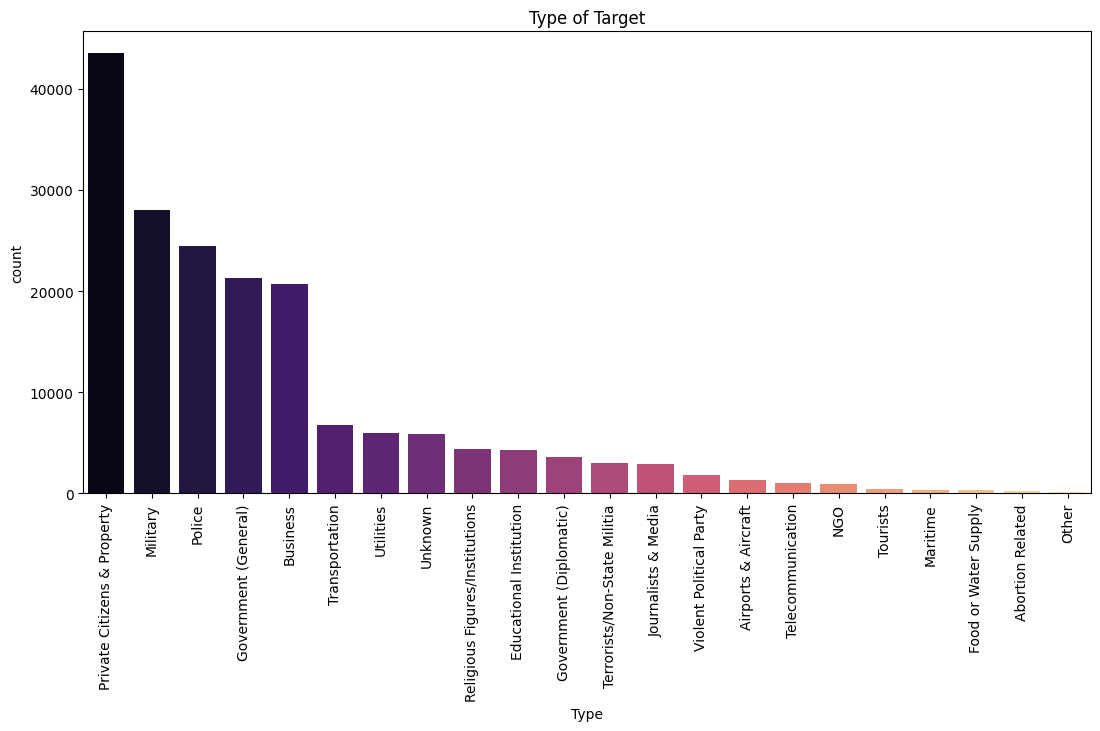

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x=terror['Target_type'],order=terror['Target_type'].value_counts().index,palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

Total number of terrorist attack in each country and regions using barplot

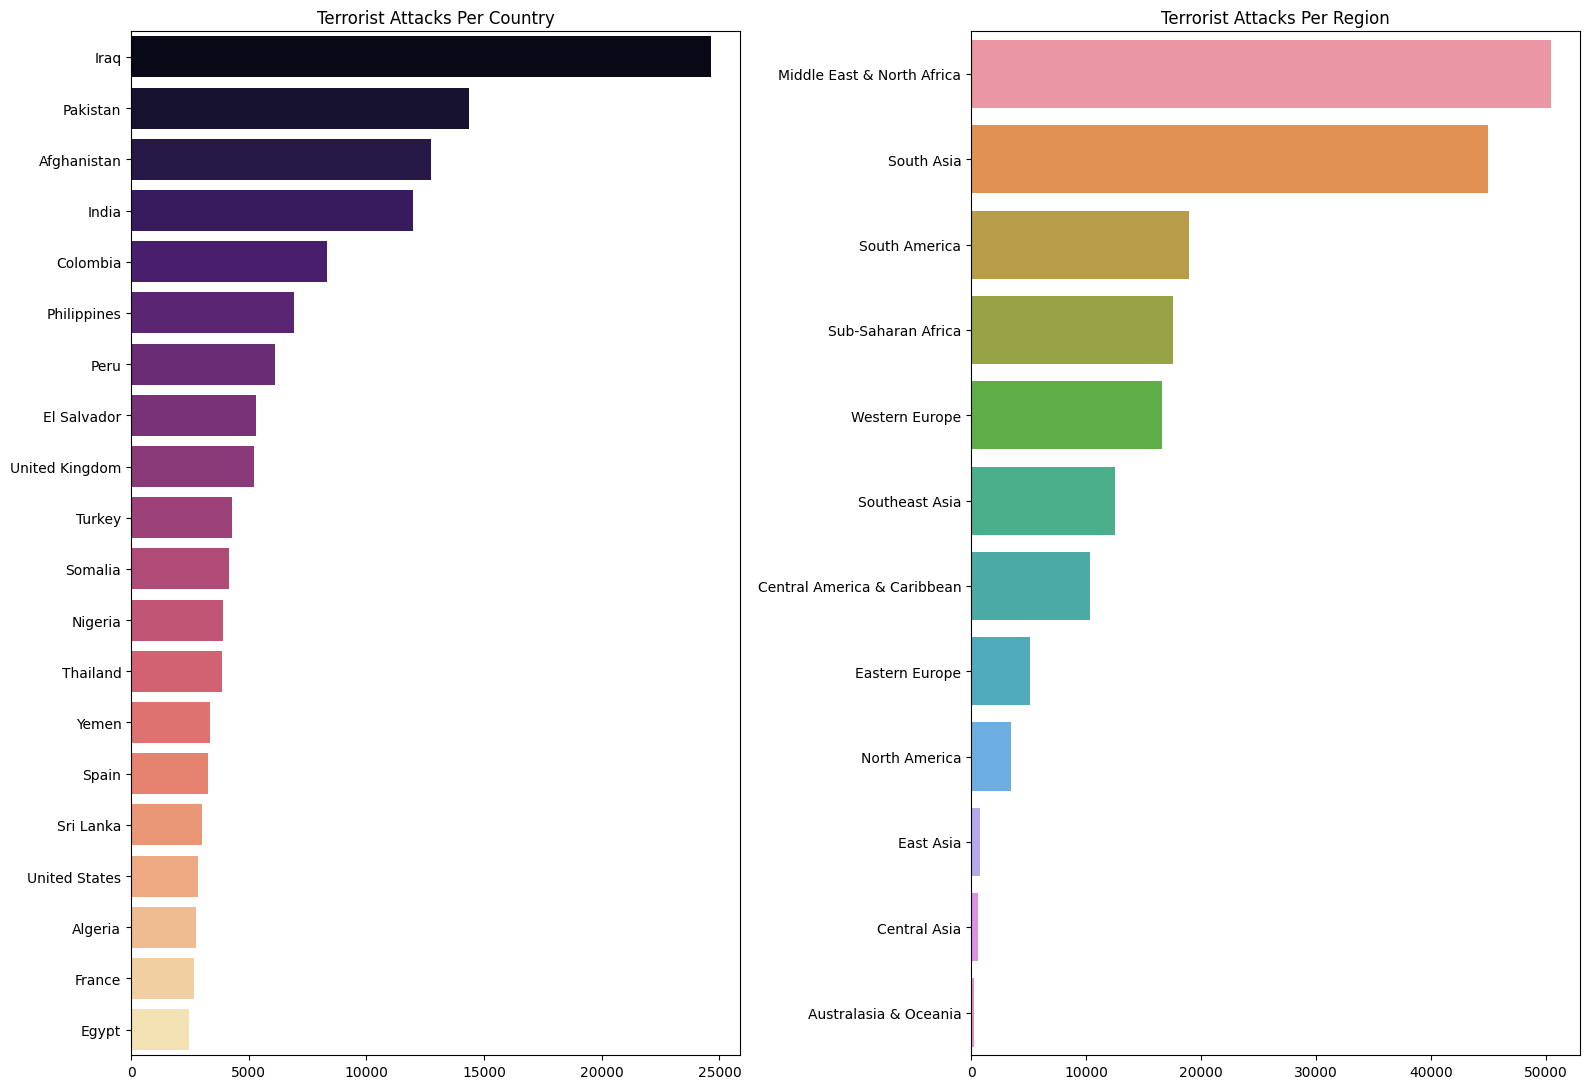

In [ ]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = terror['Country'].value_counts()[:20].values, y = terror['Country'].value_counts()[:20].index,
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks Per Country')
sns.barplot(x=terror['Region'].value_counts().values,y=terror['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks Per Region')
fig.tight_layout()
plt.show()

The total number of attacks in each country using Globe

We will first create a new dataframe which contains the total count of attacks for each country in order to use it as a colour bar.

In [ ]:
terr = terror.groupby(['Country'],as_index=False).count()

In [ ]:
fig = px.choropleth(terr,locations = 'Country',locationmode='country names',
                     color='Year',hover_name='Country',projection='orthographic',
                     title='Total number of attacks (1970-2017)',labels={'Year':'Attacks'})
fig.show()

Country suffered the maximum  attacks (stete the number) and country suffered minimum attacks(state the number)

In [ ]:
max_count=terr['Year'].max()
max_id=terr['Year'].idxmax()
max_name=terr['Country'][max_id]
min_count=terr['Year'].min()
min_id=terr['Year'].idxmin()
min_name=terr['Country'][min_id]

In [ ]:
print(max_name,'has sufferd the maximum number of terror acttacks of',max_count)
print(min_name,'has suffered the minimum number of terror acttacks of',min_count)


Iraq has sufferd the maximum number of terror acttacks of 24636
Andorra has suffered the minimum number of terror acttacks of 1


Now let us check out which terrorist organizations have carried out their operations in each country.

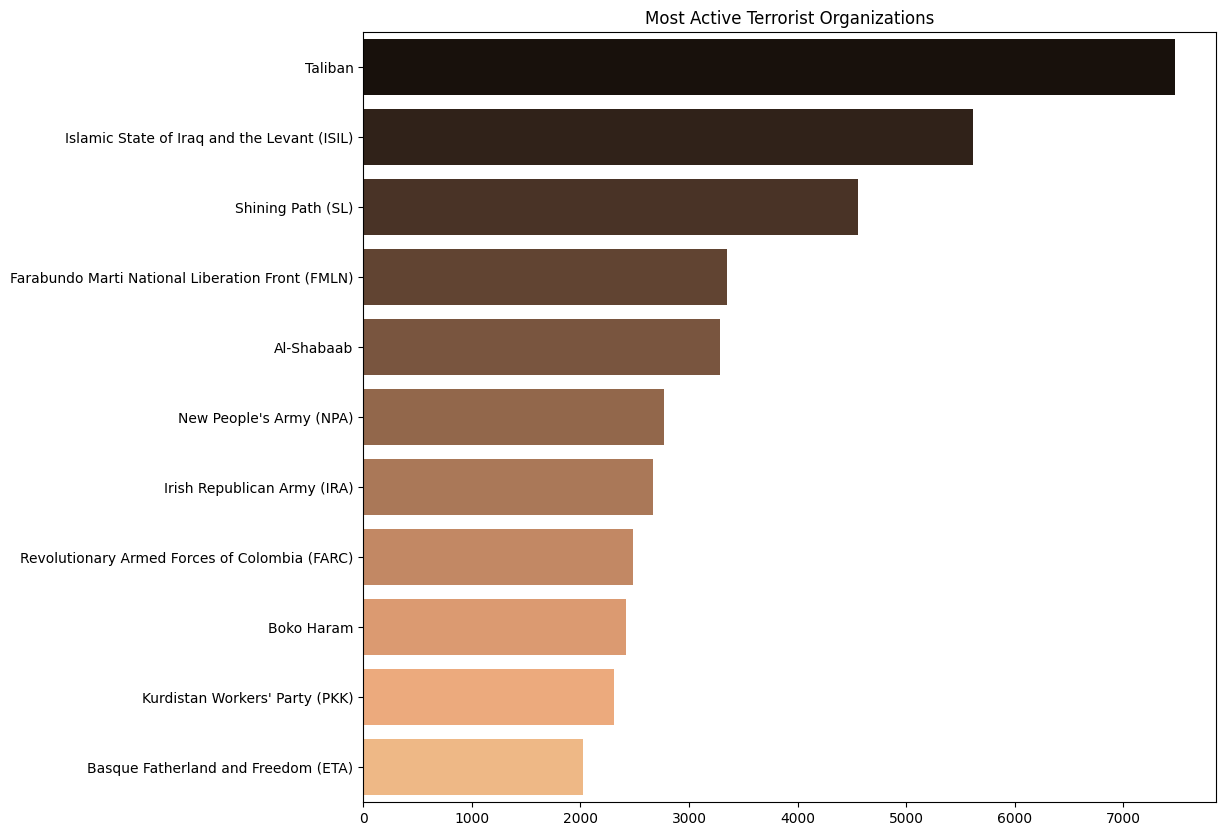

In [ ]:
plt.subplots(figsize=(11,10))
sns.barplot(y=terror['Group'].value_counts()[1:12].index,x=terror['Group'].value_counts()[1:12].values,
            palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

Now we will look closer at trend Before and after the War on Terror

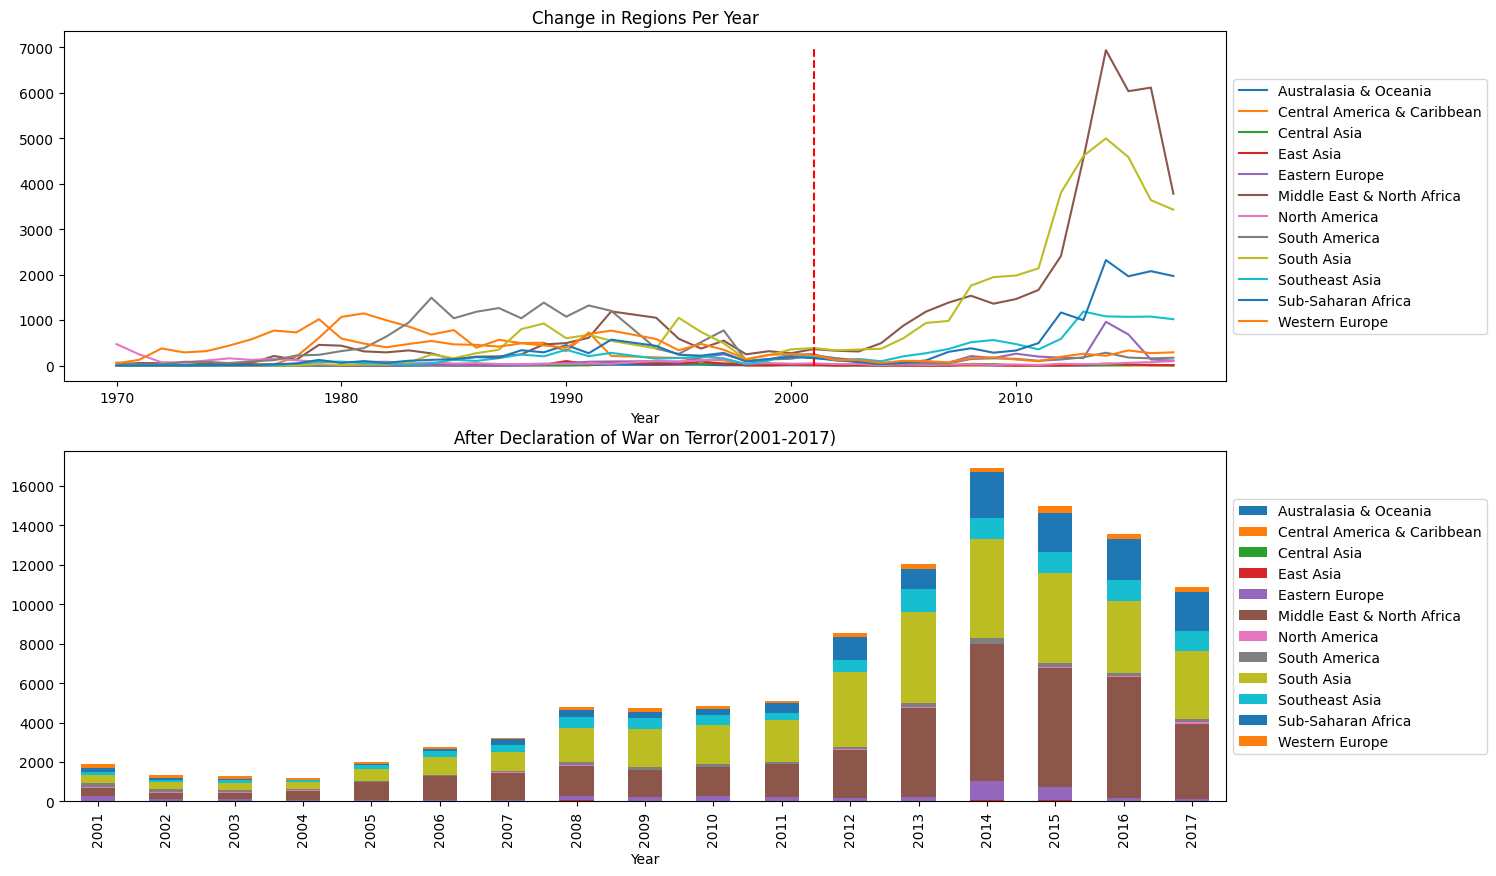

In [ ]:
data_after = terror[terror['Year']>=2001]
fig,ax = plt.subplots(figsize =(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(terror.Year,terror.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions Per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror(2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()


From the last plot, it is very noticeable that the terrorism landscape before and after the War  on Terror is vastly deffrent.Before 2001, the regions were much closer together in terms of activity,eventually all dropping to a minimum in 2001, the Middle East and South Asia have dictated the rise in terrorism numbers,with a significant increase in Sub-Saharan Africa as well.

Insights derived from the above EDA:

1) Attacks has incresed but number of people killed manier times as attack happened.

2) Iraq has the most attacks.

3) The Middle East and Africa Regions has most taregeted.

4) Maximum number of attacks are from Bombing/Explosions.

5) There are maximum number of attacks in Private citizens and Property.

6) Taliban and ISIL has a most active organisation.